# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
%pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches_updated.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"Shape of the df_data is: {df_data.shape}. It means that df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

Shape of the df_data is: (6498, 8). It means that df_data has 6498 rows and 8 columns.


In [5]:
df_data.columns #columns names

Index(['Unnamed: 0', 'Organisation', 'Location', 'Datetime', 'Details',
       'Status', 'Price', 'Mission_status'],
      dtype='object')

In [6]:
df_data.isna().values.sum() #sum of NaN values

4031

## Data Cleaning - Check for Missing Values and Duplicates

Consideration of removing columns containing junk data.

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6498 non-null   int64  
 1   Organisation    6498 non-null   object 
 2   Location        6498 non-null   object 
 3   Datetime        6498 non-null   object 
 4   Details         6498 non-null   object 
 5   Status          6498 non-null   object 
 6   Price           2467 non-null   float64
 7   Mission_status  6498 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 406.2+ KB


In [8]:
df_data.fillna(0, inplace=True)

In [9]:
df_data.isna().values.sum()

0

In [10]:
df_data.drop(columns=["Unnamed: 0"], inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    6498 non-null   object 
 1   Location        6498 non-null   object 
 2   Datetime        6498 non-null   object 
 3   Details         6498 non-null   object 
 4   Status          6498 non-null   object 
 5   Price           6498 non-null   float64
 6   Mission_status  6498 non-null   object 
dtypes: float64(1), object(6)
memory usage: 355.5+ KB


In [11]:
df_data.duplicated().values.any()

False

## Descriptive Statistics

In [12]:
df_data.describe()

,Price
count,"6,498.00"
mean,26.68
std,72.74
min,0.00
25%,0.00
50%,0.00
75%,20.00
max,876.00


# Number of Launches per Company

Creation a chart that shows the number of space mission launches by organisation.

In [80]:
organisation = df_data["Organisation"].value_counts()
donut = px.pie(labels = organisation.index, values = organisation.values, title="Number of space mission launches by organisation", names=organisation.index, hole=0.6)
donut.update_traces(textposition = "inside", textinfo="value + label")
donut.show(renderer='colab')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
df_data

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Sun Mar 26, 2023 03:30 UTC",LVM-3 | OneWeb #18,Active,62.00,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Mar 24, 2023 15:43 UTC",Falcon 9 Block 5 | Starlink Group 5-5,Active,67.00,Success
2,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Fri Mar 24, 2023 09:14 UTC",Electron/Curie | The Beat Goes On,Active,7.50,Success
3,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Mar 23, 2023 06:40 UTC",Soyuz 2.1a | Cosmos 2567,Active,17.42,Success
4,Relativity,"LC-16, Cape Canaveral SFS, Florida, USA","Thu Mar 23, 2023 03:25 UTC","Terran 1 | Good Luck, Have Fun",Active,12.00,Failure
...,...,...,...,...,...,...,...
6493,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,0.00,Failure
6494,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,0.00,Success
6495,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,0.00,Failure
6496,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success


In [15]:
df_data.columns = ['Organisation', 'Location', 'Date', "Detail", "Rocket_Status", "Price", "Mission_Status"]

In [79]:
rocked_status = df_data.Rocket_Status.value_counts()
bar = px.bar(rocked_status, title="Number of Active versus Retired Rockets")
bar.update_layout(xaxis_title="Rocked Status", yaxis_title="Number of Rockets", showlegend=False)
bar.show(renderer='colab')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
mission_status = df_data.Mission_Status.value_counts()
bar = px.bar(mission_status, title="Number of Successful versus Failed Missions")
bar.update_layout(xaxis_title="Mission Status", yaxis_title="Number of Missions", showlegend=False)
bar.show()

# How Expensive are the Launches? 

In [18]:
data_price = df_data[df_data['Price'] > 0]
data_price.sort_values("Price")

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
172,Astra,"SLC-46, Cape Canaveral SFS, Florida, USA","Sun Jun 12, 2022 17:43 UTC",Rocket 3 | TROPICS Flight 1,Retired,2.50,Failure
268,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...","Sat Nov 20, 2021 06:16 UTC",Rocket 3 | STP-27AD2,Retired,2.50,Success
401,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...","Tue Dec 15, 2020 20:55 UTC",Rocket 3 | Rocket 3.2 Orbital Launch Attempt,Retired,2.50,Failure
211,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...","Tue Mar 15, 2022 16:22 UTC",Rocket 3 | Spaceflight Astra-1,Retired,2.50,Success
225,Astra,"SLC-46, Cape Canaveral SFS, Florida, USA","Thu Feb 10, 2022 20:00 UTC",Rocket 3 | VCLS Demo-2A,Retired,2.50,Failure
...,...,...,...,...,...,...,...
3766,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Jun 18, 1983 11:33 UTC",Space Shuttle Challenger | STS-7,Retired,450.00,Success
2747,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Thu May 07, 1992 23:40 UTC",Space Shuttle Endeavour | STS-49,Retired,450.00,Success
2783,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,Retired,450.00,Success
2439,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Oct 20, 1995 13:53 UTC",Space Shuttle Columbia | STS-73,Retired,450.00,Success


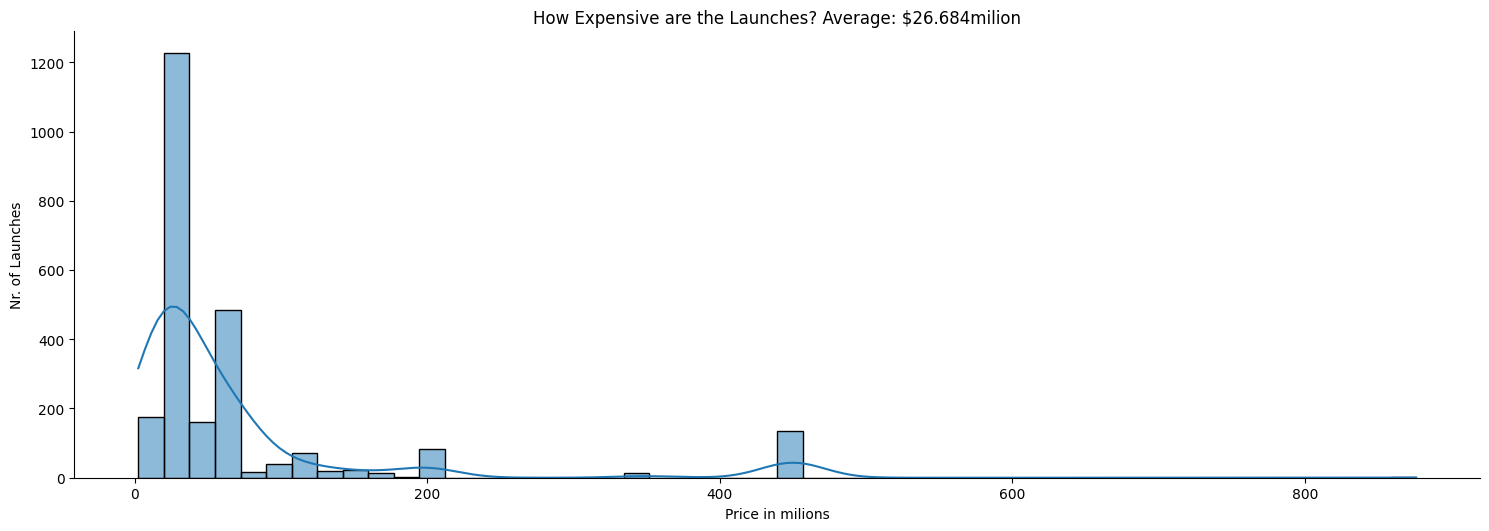

In [19]:
sns.displot(data_price, 
            bins=50, 
            aspect=3,
            kde=True, 
            color='#2196f3',
            legend=False)
plt.title(f'How Expensive are the Launches? Average: ${(df_data.Price.mean()):.5}milion')
plt.xlabel('Price in milions')
plt.ylabel('Nr. of Launches')

plt.show()

# Using a Choropleth Map to Show the Number of Launches by Country

* Creation a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/) 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [20]:
data_location = df_data.Location.astype(str).str.split(",")

In [21]:
for country in data_location:
  if " Russia" in country[-1]:
   country[-1] = "Russian Federation"
  if " New Mexico" in country[-1]:
    country[-1] = "USA"
  if " Yellow Sea" in country[-1]:
     country[-1] = "China"
  if " Shahrud Missile Test Site" in country[-1]:
    country[-1] = 'Iran, Islamic Republic of'
  if " Pacific Missile Range Facility" in country[-1]:
     country[-1] = "USA"
  if " Barents Sea" in country[-1]:
     country[-1] = "Russian Federation"
  if " Gran Canaria" in country[-1]:
     country[-1] = "USA"
  if "Iran" in country[-1]:
     country[-1] = 'Iran, Islamic Republic of'
  if ' North Korea' in country[-1]:
    country[-1] = "Korea, Democratic People's Republic of"
  if ' South Korea' in country[-1]:
    country[-1] = "Korea, Republic of"
  if ' Pacific Ocean' in country[-1]:
     country[-1] = "USA"
  if ' United Kingdom' in country[-1]:
     country[-1] = "GBR"

In [22]:
ISO = []
for country in data_location:
  country_name = country[-1].strip()
  ISO.append(countries.get(country_name).alpha3)

In [23]:
df_data.insert(2, 'ISO', ISO)

In [24]:
df_data

,Organisation,Location,ISO,Date,Detail,Rocket_Status,Price,Mission_Status
0,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",IND,"Sun Mar 26, 2023 03:30 UTC",LVM-3 | OneWeb #18,Active,62.00,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",USA,"Fri Mar 24, 2023 15:43 UTC",Falcon 9 Block 5 | Starlink Group 5-5,Active,67.00,Success
2,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand",NZL,"Fri Mar 24, 2023 09:14 UTC",Electron/Curie | The Beat Goes On,Active,7.50,Success
3,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia",RUS,"Thu Mar 23, 2023 06:40 UTC",Soyuz 2.1a | Cosmos 2567,Active,17.42,Success
4,Relativity,"LC-16, Cape Canaveral SFS, Florida, USA",USA,"Thu Mar 23, 2023 03:25 UTC","Terran 1 | Good Luck, Have Fun",Active,12.00,Failure
...,...,...,...,...,...,...,...,...
6493,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,0.00,Failure
6494,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",USA,"Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,0.00,Success
6495,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,0.00,Failure
6496,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",KAZ,"Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success


In [25]:
lounches_by_country = df_data.groupby(['ISO'], as_index=False).agg({'Detail': pd.Series.count})
lounches_by_country.columns = ["Country", "Number of Launches"]
lounches_by_country.sort_values("Number of Launches", ascending=False)

,Country,Number of Launches
16,USA,1986
15,RUS,1806
9,KAZ,1548
2,CHN,520
3,FRA,321
8,JPN,130
5,IND,86
13,NZL,33
6,IRN,17
7,ISR,13


In [26]:
plt.figure(figsize=(18,16))
fig = px.choropleth(lounches_by_country, locations="Country",
                    color="Number of Launches",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

<Figure size 1800x1600 with 0 Axes>

# Using a Choropleth Map to Show the Number of Failures by Country


In [27]:
failures_data = df_data[df_data['Mission_Status']=="Failure"]

In [28]:
failures_by_country = failures_data.groupby(['ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})
failures_by_country.columns = ["Country", "Number of Failures"]
failures_by_country.sort_values("Number of Failures", ascending=False)

,Country,Number of Failures
15,USA,168
9,KAZ,113
14,RUS,72
2,CHN,26
3,FRA,15
8,JPN,13
5,IND,10
6,IRN,8
0,AUS,4
7,ISR,4


In [29]:
plt.figure(figsize=(18,16))
fig = px.choropleth(failures_by_country, locations="Country",
                    color="Number of Failures",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

<Figure size 1800x1600 with 0 Axes>

# Creation a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [30]:
launch_data = df_data.groupby(['ISO', "Organisation", "Mission_Status"], as_index=False).agg({'Detail': pd.Series.count})
launch_data.columns = ['ISO', "Organisation", "Mission_Status", "Amount"]
launch_data

,ISO,Organisation,Mission_Status,Amount
0,AUS,ABMA,Success,1
1,AUS,CECLES,Failure,3
2,AUS,RAE,Failure,1
3,AUS,RAE,Success,1
4,BRA,AEB,Failure,2
...,...,...,...,...
145,USA,Virgin Galactic,Failure,1
146,USA,Virgin Galactic,Partial Failure,1
147,USA,Virgin Galactic,Success,10
148,USA,Virgin Orbit,Failure,1


In [31]:
burst = px.sunburst(launch_data, 
                    path=['ISO', 'Organisation', 'Mission_Status'], 
                    values='Amount',
                    title='Number of Space Launches by Country, Organisation and Mission Status',
                   )
 
burst.update_layout(xaxis_title='Number of Space Launches', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Analysing the Total Amount of Money Spent by Organisation on Space Missions

In [32]:
money_spent_by_organisation = df_data.groupby(["Organisation"], as_index=False).agg({'Price': pd.Series.sum})
money_spent_by_organisation = money_spent_by_organisation[money_spent_by_organisation['Price']>0]
money_spent_by_organisation.sort_values("Price")

,Organisation,Price
0,ABL SS,12.00
45,Relativity,12.00
49,Sandia,15.00
6,Astra,17.50
15,EER,20.00
20,GK LS,23.00
11,CASIC,23.20
21,Galactic Energy,24.50
19,Firefly,30.00
16,ESA,37.00


In [33]:
h_bar = px.bar(x=money_spent_by_organisation.Price, y=money_spent_by_organisation.Organisation, orientation='h', title= "Total Amount of Money Spent by Organisation on Space Missions", color=money_spent_by_organisation.Price, color_continuous_scale = "Plotly3")
h_bar.update_layout(xaxis_title = "Price in milions", yaxis_title="Organisation", coloraxis_showscale = False)
h_bar.show()

# Analysing the Amount of Money Spent by Organisation per Launch

In [34]:
money_spent_by_organisation_perLaunch = df_data.groupby(["Organisation", "Detail", "Price"], as_index=False).agg({'Price': pd.Series.sum})
money_spent_by_organisation_perLaunch = money_spent_by_organisation_perLaunch[money_spent_by_organisation_perLaunch["Price"]>0]
money_spent_by_organisation_perLaunch.sort_values("Price")

,Organisation,Detail,Price
328,Astra,Rocket 3 | Rocket 3.1 Orbital Launch Attempt,2.50
330,Astra,Rocket 3 | STP-27AD1,2.50
331,Astra,Rocket 3 | STP-27AD2,2.50
332,Astra,Rocket 3 | Spaceflight Astra-1,2.50
333,Astra,Rocket 3 | TROPICS Flight 1,2.50
...,...,...,...
2034,NASA,Space Shuttle Columbia | STS-62,450.00
2035,NASA,Space Shuttle Columbia | STS-65,450.00
2027,NASA,Space Shuttle Columbia | STS-40,450.00
2045,NASA,Space Shuttle Columbia | STS-94,450.00


In [35]:
h_bar = px.bar(x=money_spent_by_organisation_perLaunch.Price, y=money_spent_by_organisation_perLaunch.Organisation, orientation='h', title= "Amount of Money Spent by Organisation per Launch", color=money_spent_by_organisation_perLaunch.Detail)
h_bar.update_layout(xaxis_title = "Price in milions", yaxis_title="Organisation")
h_bar.show()

# Chart the Number of Launches per Year

In [37]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True, format='mixed')

In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    6498 non-null   object             
 1   Location        6498 non-null   object             
 2   ISO             6498 non-null   object             
 3   Date            6498 non-null   datetime64[ns, UTC]
 4   Detail          6498 non-null   object             
 5   Rocket_Status   6498 non-null   object             
 6   Price           6498 non-null   float64            
 7   Mission_Status  6498 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 406.2+ KB


In [39]:
launch_years = df_data.Date.dt.year
df_data['Launch_Year'] = launch_years
df_data

,Organisation,Location,ISO,Date,Detail,Rocket_Status,Price,Mission_Status,Launch_Year
0,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",IND,2023-03-26 03:30:00+00:00,LVM-3 | OneWeb #18,Active,62.00,Success,2023
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",USA,2023-03-24 15:43:00+00:00,Falcon 9 Block 5 | Starlink Group 5-5,Active,67.00,Success,2023
2,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand",NZL,2023-03-24 09:14:00+00:00,Electron/Curie | The Beat Goes On,Active,7.50,Success,2023
3,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia",RUS,2023-03-23 06:40:00+00:00,Soyuz 2.1a | Cosmos 2567,Active,17.42,Success,2023
4,Relativity,"LC-16, Cape Canaveral SFS, Florida, USA",USA,2023-03-23 03:25:00+00:00,"Terran 1 | Good Luck, Have Fun",Active,12.00,Failure,2023
...,...,...,...,...,...,...,...,...,...
6493,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,Retired,0.00,Failure,1958
6494,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA",USA,1958-02-01 03:47:00+00:00,Juno I | Explorer 1,Retired,0.00,Success,1958
6495,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA",USA,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,Retired,0.00,Failure,1957
6496,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",KAZ,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik 2,Retired,0.00,Success,1957


In [40]:
nr_of_Lounches_per_year = df_data.groupby(["Launch_Year"], as_index=False).agg({'Detail': pd.Series.count})

In [41]:
nr_of_Lounches_per_year.columns = ["Launch_Year", "Amount"]
nr_of_Lounches_per_year

,Launch_Year,Amount
0,1957,3
1,1958,28
2,1959,24
3,1960,41
4,1961,56
...,...,...
62,2019,107
63,2020,118
64,2021,157
65,2022,191


Since the 2023 data is not yet complete, we will disable it to not interfere with data analysis.

In [42]:
nr_of_Lounches_per_year = nr_of_Lounches_per_year[nr_of_Lounches_per_year["Launch_Year"] < 2023]
nr_of_Lounches_per_year

,Launch_Year,Amount
0,1957,3
1,1958,28
2,1959,24
3,1960,41
4,1961,56
...,...,...
61,2018,120
62,2019,107
63,2020,118
64,2021,157


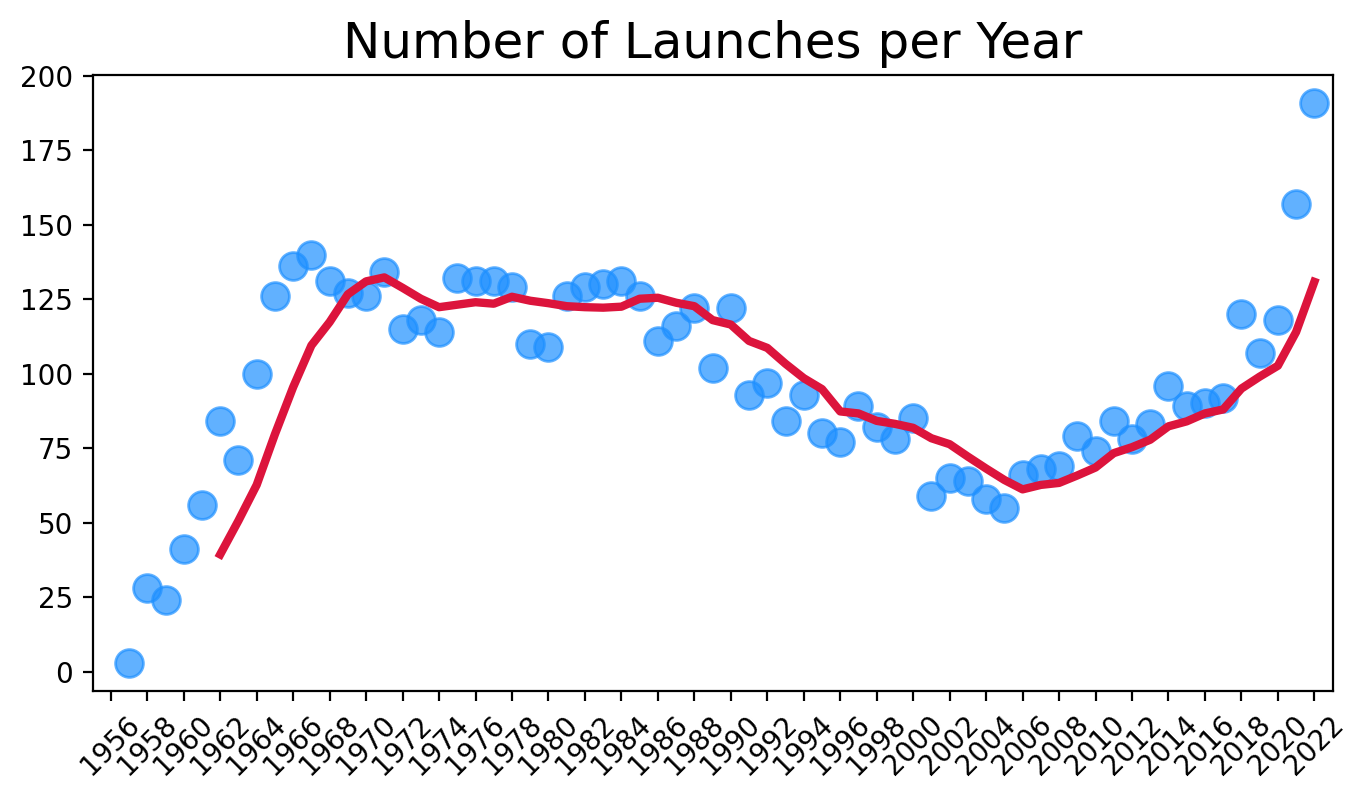

In [43]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of Launches per Year', fontsize=18)
plt.xticks(ticks=np.arange(1950, 2030, step=2), rotation=45)

ax=plt.gca()
ax.set_xlim(1955,2023)

roll = nr_of_Lounches_per_year.rolling(window=6).mean()

ax.plot(nr_of_Lounches_per_year.Launch_Year, roll.Amount, c='crimson', 
        linewidth=3,)

ax.scatter(data=nr_of_Lounches_per_year, x="Launch_Year", y="Amount", c='dodgerblue',
           alpha=0.7,
           s=100)

plt.show()

# Total Number of Launches Year-on-Year until the Present

In [44]:
nr_of_Lounches_over_years = df_data.groupby(["Launch_Year"], as_index=False).agg({'Detail': pd.Series.count}) 
nr_of_Lounches_over_years = nr_of_Lounches_over_years.groupby(by=['Launch_Year']).sum().cumsum()
nr_of_Lounches_over_years.reset_index(inplace=True) 
nr_of_Lounches_over_years.columns = ["Launch_Year", "Total_Launches_Number"]
nr_of_Lounches_over_years

,Launch_Year,Total_Launches_Number
0,1957,3
1,1958,31
2,1959,55
3,1960,96
4,1961,152
...,...,...
62,2019,5985
63,2020,6103
64,2021,6260
65,2022,6451


In [45]:
l_chart = px.line(nr_of_Lounches_over_years,
                  x='Launch_Year', 
                  y='Total_Launches_Number')

l_chart.update_layout(title='Total Launch Number Over Time',
                      xaxis_title='Year',
                      yaxis_title='Total Launch Number')
 
l_chart.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [46]:
launch_month = df_data.Date.dt.strftime('%B')
df_data['Launch_Month'] = launch_month

In [47]:
nr_of_Lounches_per_month = df_data.groupby(["Launch_Month"], as_index=False).agg({'Detail': pd.Series.count})
nr_of_Lounches_per_month.columns = ["Launch_Month", "Amount"]
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
nr_of_Lounches_per_month.sort_values('Launch_Month', key = lambda x : x.apply (lambda x : month_dict[x]), inplace=True)
nr_of_Lounches_per_month

,Launch_Month,Amount
4,January,395
3,February,487
7,March,512
0,April,558
8,May,514
6,June,583
5,July,533
1,August,560
11,September,567
10,October,588


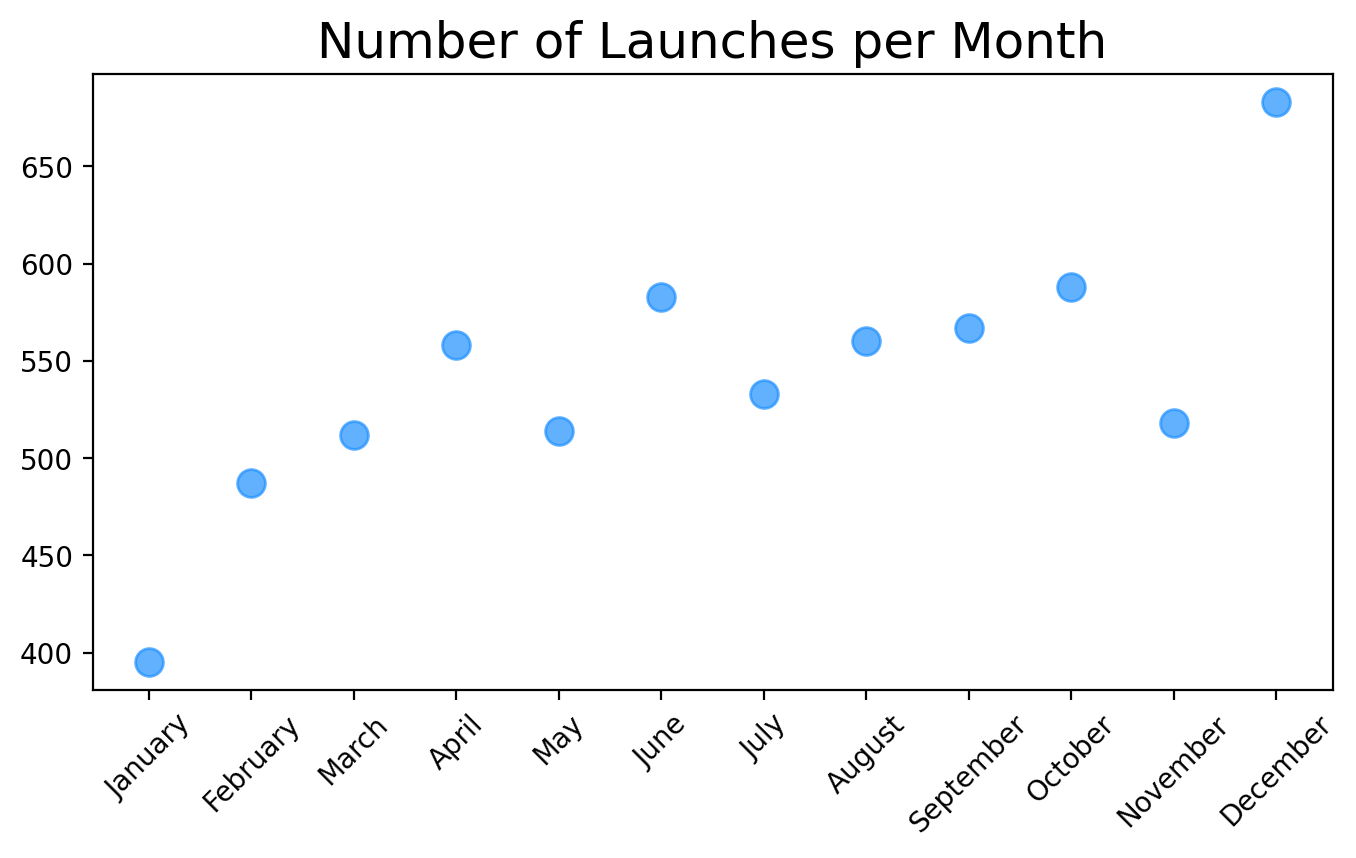

In [48]:
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(rotation=45)
plt.title('Number of Launches per Month', fontsize=18)

ax=plt.gca()

ax.scatter(data=nr_of_Lounches_per_month, x="Launch_Month", y="Amount", c='dodgerblue',
           alpha=0.7,
           s=100)

plt.show()

# How has the Launch Price varied Over Time? 
 

In [49]:
launch_price_over_time = df_data.groupby(["Launch_Year", "Price"], as_index=False).agg({'Price': pd.Series.sum})

In [50]:
launch_price_over_time = launch_price_over_time[launch_price_over_time['Price']>0]
launch_price_over_time.sort_values("Price")

,Launch_Year,Price
624,2021,4.90
690,2023,4.90
590,2020,4.90
623,2021,5.00
589,2020,5.00
...,...,...
118,1995,"3,150.00"
98,1992,"3,600.00"
131,1997,"3,600.00"
678,2022,"4,020.00"


In [51]:
l_chart = px.line(launch_price_over_time,
                  x='Launch_Year', 
                  y='Price')

l_chart.update_layout(title='Launch Price varied Over Time',
                      xaxis_title='Launch Year',
                      yaxis_title='Launch Price in milions')
 
l_chart.show()

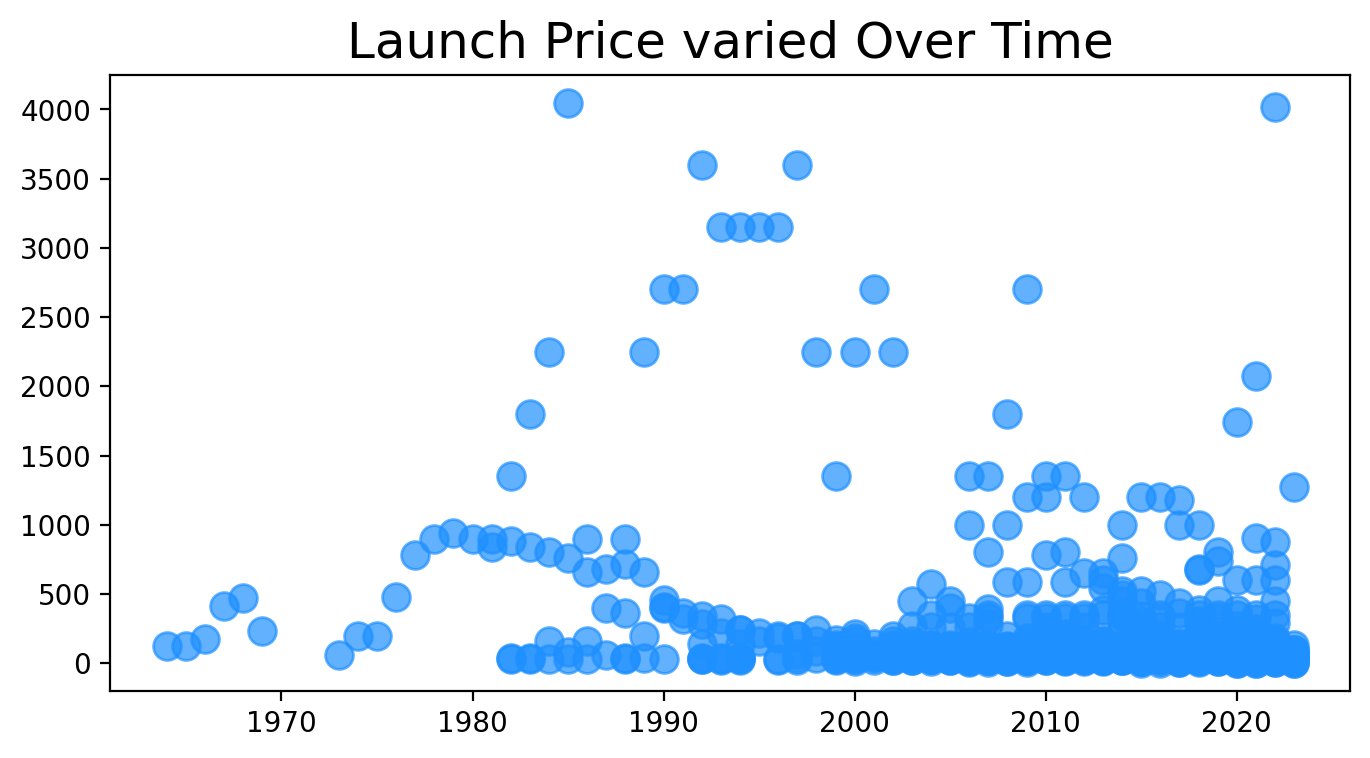

In [52]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Launch Price varied Over Time', fontsize=18)

ax=plt.gca()

ax.scatter(data=launch_price_over_time, x="Launch_Year", y="Price", c='dodgerblue',
           alpha=0.7,
           s=100)

plt.show()

# Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [53]:
launch_data = df_data.groupby(["Organisation"], as_index=False).agg({'Detail': pd.Series.count})
top10_organisations = launch_data.sort_values("Detail").tail(10)
launch_by_organisation_over_time = df_data.groupby(['Launch_Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})
top10org_launches_years = pd.merge(top10_organisations, launch_by_organisation_over_time, on="Organisation")
top10org_launches_years.columns = ["Organisation", "Total_Launches", "Launch_Year", "Launches_per_Year"]

In [54]:
l_chart = px.line(top10org_launches_years,
                  x='Launch_Year', 
                  y='Launches_per_Year',
                  color='Organisation',
                  hover_name='Organisation')
 
l_chart.update_layout(title="Number of Launches over Time by the Top 10 Organisations", xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [55]:
cold_war = df_data.loc[(df_data.Launch_Year <= 1991)]

In [56]:
USSR = cold_war.query("'RUS' in ISO or 'KAZ' in ISO")
USA = cold_war.query("'USA' in ISO")
cold_war_USAvsUSSR = pd.concat([USA, USSR])

In [57]:
USA_vs_USSR = []
for row in cold_war_USAvsUSSR.ISO:
  if "USA" in row:
    USA_vs_USSR.append("USA")
  else:
    USA_vs_USSR.append("USSR")

cold_war_USAvsUSSR["USA_vs_USSR"] = USA_vs_USSR

In [58]:
cold_war_USAvsUSSR_count = cold_war_USAvsUSSR.groupby(['Launch_Year', "USA_vs_USSR"], as_index=False).agg({'Detail': pd.Series.count})
cold_war_USAvsUSSR_count.columns = ["Launch_Year", "Cold_War_Site", "Nr_of_Launches"]

In [59]:
l_chart = px.line(cold_war_USAvsUSSR_count,
                  x='Launch_Year',
                  y='Nr_of_Launches',
                  color='Cold_War_Site',
                  hover_name='Cold_War_Site')


l_chart.update_layout(title="Cold War Space Race: USA vs USSR", xaxis_title='Launch Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

## Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [60]:
cold_war_USAvsUSSR_total = cold_war_USAvsUSSR_count.groupby(['Cold_War_Site'], as_index=False).agg({'Nr_of_Launches': pd.Series.sum})
cold_war_USAvsUSSR_total

,Cold_War_Site,Nr_of_Launches
0,USA,1075
1,USSR,2478


In [61]:
donut = px.pie(cold_war_USAvsUSSR_total, "Cold_War_Site", "Nr_of_Launches", title="Cold War Space Race: USA vs USSR", hole=0.6)
donut.update_traces(textposition = "inside", textinfo="percent + label")
donut.show()

## Total Number of Mission Failures Year on Year.

In [62]:
mision_status_over_year = df_data.groupby(['Launch_Year', "Mission_Status"], as_index=False).agg({'Detail': pd.Series.count})
mision_status_over_year.columns = ["Launch_Year", "Mission_Status", "Nr_of_Launches"]
mision_failures_over_year = mision_status_over_year[mision_status_over_year["Mission_Status"]=="Failure"]

In [63]:
l_chart = px.line(mision_status_over_year,
                  x='Launch_Year',
                  y='Nr_of_Launches',
                  color='Mission_Status',
                  hover_name='Mission_Status')


l_chart.update_layout(title="Total Number of Launches Year on Year by Mission Status", xaxis_title='Launch Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

In [64]:
l_chart = px.line(mision_failures_over_year,
                  x='Launch_Year',
                  y='Nr_of_Launches')


l_chart.update_layout(title="Total Number of Failures Year on Year", xaxis_title='Launch Year',
                      yaxis_title='Number of Failures')
 
l_chart.show()

## Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [65]:
launches_over_year = mision_status_over_year.groupby(['Launch_Year'], as_index=False).agg({'Nr_of_Launches': pd.Series.sum})

In [66]:
failure_launches_over_year = pd.merge(mision_failures_over_year, launches_over_year, on="Launch_Year")
failure_launches_over_year.columns = ["Launch_Year", "Mission_Status", "Nr_of_Failures", "Total_Launch_Number"]

In [67]:
failure_launches_over_year["Failures_Percentage"] = (failure_launches_over_year["Nr_of_Failures"] / failure_launches_over_year["Total_Launch_Number"] * 100)

In [68]:
l_chart = px.line(failure_launches_over_year,
                  x='Launch_Year',
                  y='Failures_Percentage')


l_chart.update_layout(title="Percentage Number of Failures Year on Year", xaxis_title='Launch Year',
                      yaxis_title='Percentage of Failures')
 
l_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches

Do the results change if we only look at the number of successful launches? 

In [69]:
launches_over_years_by_country = df_data.groupby(['Launch_Year', "ISO"], as_index=False).agg({'Detail': pd.Series.count})
launches_over_years_by_country.columns = ["Launch_Year", "Country", "Nr_of_Launches"]

In [70]:
l_chart = px.line(launches_over_years_by_country,
                  x='Launch_Year',
                  y='Nr_of_Launches',
                  color='Country',
                  hover_name='Country')
 
l_chart.update_layout(title="Which Country was in the Lead in terms of Total Number of Launches?", 
                      xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

In [71]:
launches_over_years_by_country_mstatus = df_data.groupby(['Launch_Year', "ISO", "Mission_Status"], as_index=False).agg({'Detail': pd.Series.count})
launches_over_years_by_country_success = launches_over_years_by_country_mstatus[launches_over_years_by_country_mstatus["Mission_Status"]=="Success"]
launches_over_years_by_country_success.columns = ["Launch_Year", "Country", "Mission_Status", "Nr_of_Launches"]

In [72]:
l_chart = px.line(launches_over_years_by_country_success,
                  x='Launch_Year',
                  y='Nr_of_Launches',
                  color='Country',
                  hover_name='Country')
 
l_chart.update_layout(title="Total Number of Successful Launches by Country", xaxis_title='Year',
                      yaxis_title='Number of Success Launches')
 
l_chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [73]:
launches_over_years_by_organisation = df_data.groupby(['Launch_Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})
launches_over_years_by_organisation.columns = ["Launch_Year", "Organisation", "Nr_of_Launches"]

In [74]:
l_chart = px.line(launches_over_years_by_organisation,
                  x='Launch_Year',
                  y='Nr_of_Launches',
                  color='Organisation',
                  hover_name='Organisation')
 
l_chart.update_layout(title="Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches", xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()